In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Praktik_KA/KNN_Regression_Data.csv")
print(data.head())

   Weight (kg)  Diameters (cm)  Quality Score
0            2              38      98.844817
1            1              66      55.861043
2            5              39      39.654920
3            4              57      47.543373
4            4              57      63.931408


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = data[["Weight (kg)", "Diameters (cm)"]]
y = data["Quality Score"]

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data (standarisasi)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Membuat model KNN untuk regresi
k = 5  # Jumlah tetangga
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Melatih model
knn_regressor.fit(X_train, y_train)

# Memprediksi data uji
y_pred = knn_regressor.predict(X_test)

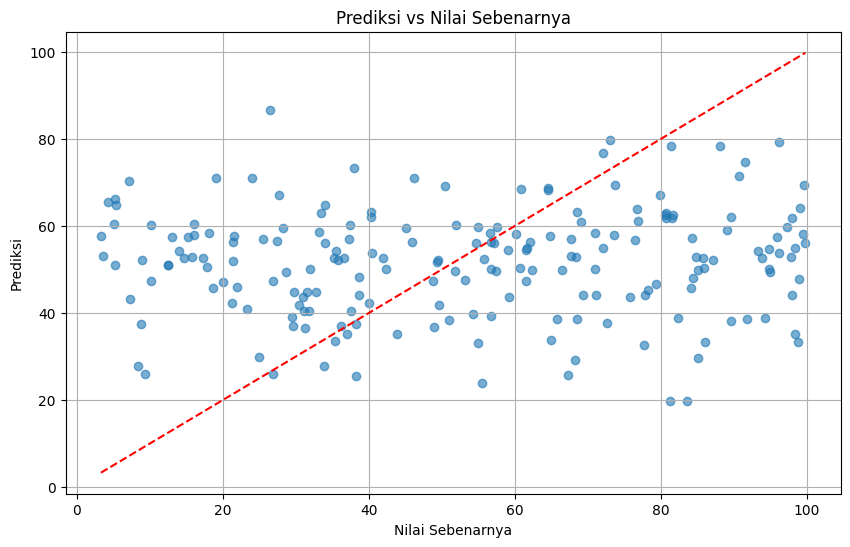

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot untuk membandingkan hasil prediksi dan nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Prediksi vs Nilai Sebenarnya")
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Prediksi")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.grid()
plt.show()

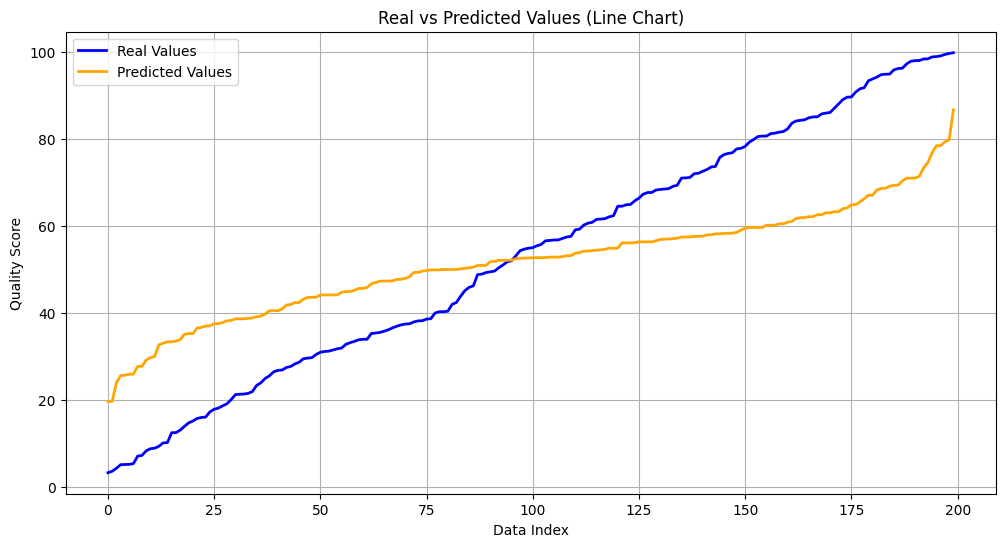

In [ ]:
# Visualisasi hasil dengan grafik garis
plt.figure(figsize=(12, 6))

# Membuat garis untuk nilai sebenarnya
plt.plot(range(len(y_test)), sorted(y_test), color='blue', label='Real Values', linewidth=2)

# Membuat garis untuk nilai prediksi
plt.plot(range(len(y_pred)), sorted(y_pred), color='orange', label='Predicted Values', linewidth=2)

plt.title("Real vs Predicted Values (Line Chart)")
plt.xlabel("Data Index")
plt.ylabel("Quality Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung R²
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 908.2546156862412
R-squared (R²): -0.1465450504039172
